# Barabasi-Albert network model

## Model implementation

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
def ba_network(N, m) :
    '''
    Generate and return a network with a scale-free degree distribution, 
    generated according to the Barabási-Albert network model.

    Starting from `m0 = m` nodes in a fully-connected network, add a 
    new node and connect it to `m` existing nodes with probability proportional
     to node degree. Repeat until there are `N` nodes in the network.
    '''
    # Initialize with fully-connected network
    m0 = m
    G = nx.complete_graph(m0)

    idx = np.array(range(N))    # Index of node labels (used for sampling)
    ks = np.zeros(N)            # Array of node degrees
    ks[:m0] = m0 - 1
    k_sum = m0 * (m0 - 1)       # Counter for total degree

    # Add t = N - m0 nodes
    for i in range(m0, N) :
        # Pick nodes to connect to
        ns = np.random.choice(idx, size=m, replace=False, p=ks/k_sum)

        # Add edges from new node (i) to selected nodes (ns)
        G.add_edges_from(zip([i]*m, ns))

        # Update degree array and counters
        ks[i] = m
        np.add.at(ks, ns, 1)
        k_sum = k_sum + 2*m
    
    return G

The below code will generate a fresh network. For $N > 10^5$ it will take a couple of minutes, though! Better to generate a smaller network or load the one stored in "ba_100K.gml", which is for $N=10^5$ and $m=3$.

In [3]:
G = nx.read_gml('ba_100K.gml')
N = G.number_of_nodes()

print(N)

100000


or

In [3]:
m = 3
N = 10**3

G = ba_network(N, m)

The below drawing function will take a few minutes to run as well. Consider your choices carefully.

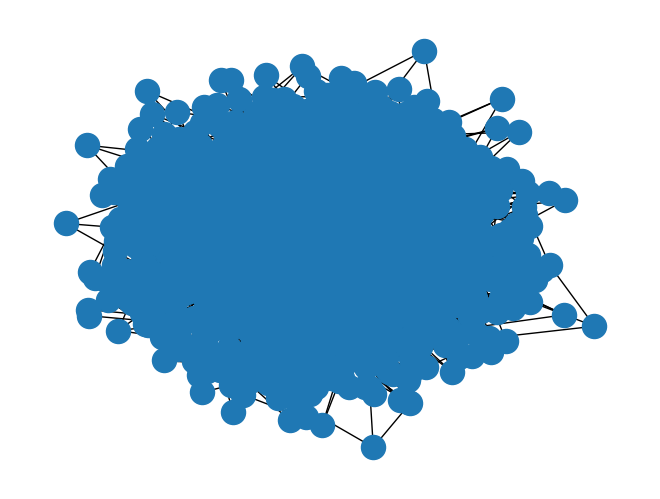

In [4]:
nx.draw(G)

**Ew.**

(See end of notebook for decent visualizations.)

In [5]:
print(f"Number of nodes: {G.number_of_nodes()}; original model: {N}")
print(f"Number of edges: {G.number_of_edges()}; original model: {(N-m) * m}") 

Number of nodes: 1000; original model: 1000
Number of edges: 2994; original model: 2991


The original paper specifies the number of nodes and edges we should expect. The discrepancy in the number of edges is due to the initialization procedure. In the original paper, the authors start with 0 edges, but by starting with a fully-connected graph, an extra $\frac{m(m-1)}{2}$ edges are added:

In [6]:
m * (m-1) / 2

3.0

## Degree distribution

The cells below generate the figures used in the presentation for the analysis of degree distributions. The network used in the first plots is the one imported above from the file "ba_100K.gml".

In [7]:
import collections
from scipy import optimize

def powerdis(x,a,b,gamma):
    return a*np.exp(np.log(x)*(-gamma))+b

def linf(x,a,b):
    return a*x+b

[ 5.32457086e+00 -6.59117213e-04  2.38553797e+00]
0.04278334197269001
[-1.84974499  0.12448993]
0.49693468192836676


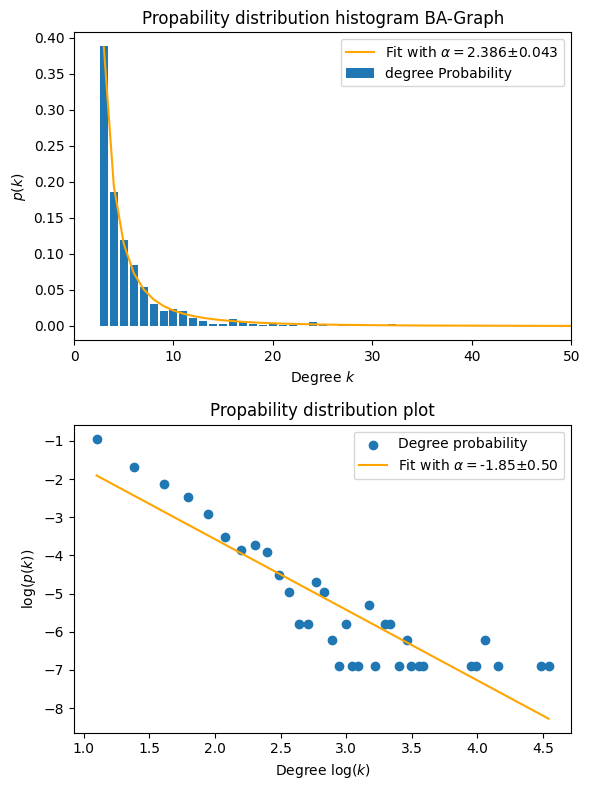

In [8]:
import collections

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total


fig = plt.figure("Degree Distribution", figsize=(6,8))
axgrid = fig.add_gridspec(4, 6)

params,covariance=optimize.curve_fit(powerdis,deg[-40:], degP[-40:])
print(params)
print(np.diag(covariance)[2]**0.5)

ax0 = fig.add_subplot(axgrid[0:2, :])
#ax0.bar(*np.unique(degree_sequence, return_counts=True))
ax0.bar(deg, degP, label="degree Probability")
ax0.plot(deg, powerdis(deg, *params), color="orange",label="Fit with $\\alpha=$"+str("%.3f" % params[2])+"$\pm$"+str("%.3f" % np.diag(covariance)[2]**0.5))

ax0.set_xlim(0,50)
ax0.set_title("Propability distribution histogram BA-Graph")
ax0.set_xlabel("Degree $k$")
ax0.set_ylabel("$p(k)$")
ax0.legend()


params2,covariance2=optimize.curve_fit(linf,np.log(deg[-40:]),np.log(degP[-40:]))
print(params2)
print(np.diag(covariance2)[1]**0.5)

ax2 = fig.add_subplot(axgrid[2:, :])
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-40:]), (linf(np.log(deg[-40:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdis.pdf", bbox_inches="tight")

In [9]:
Glist=[]
for i in range(2,5):
    m = 3
    N   = 10**i
    Glist.append(ba_network(N, m))

[ 4.11253383e+00 -1.62848122e-03  2.18511235e+00]
[-2.69499737  2.05016055]
0.28424961996396436


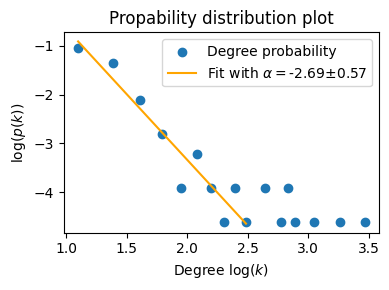

In [10]:
degree_sequence = sorted((d for n, d in Glist[0].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-10:]),np.log(degP[-10:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-10:]), (linf(np.log(deg[-10:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdis100.pdf", bbox_inches="tight")

[ 6.38245292e+00 -1.91572870e-04  2.51311479e+00]
[-2.50720917  1.79340271]
0.030499330350201286


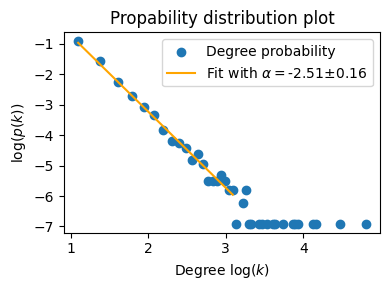

In [11]:
degree_sequence = sorted((d for n, d in Glist[1].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-20:]),np.log(degP[-20:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-20:]), (linf(np.log(deg[-20:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdis1000.pdf", bbox_inches="tight")

[ 5.78278794e+00 -5.29546695e-04  2.43810636e+00]
[-2.75811043  2.28142152]
0.014580708769075879


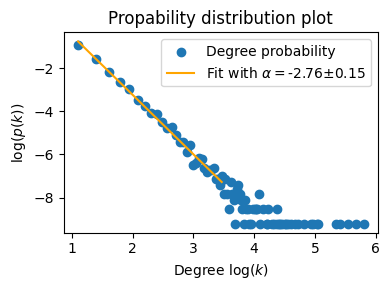

In [12]:
degree_sequence = sorted((d for n, d in Glist[2].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-30:]),np.log(degP[-30:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-30:]), (linf(np.log(deg[-30:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdis10000.pdf", bbox_inches="tight")

In [13]:
Glist2=[]
for i in (3,6,9,12):
    m = i
    N   = 10**3
    Glist2.append(ba_network(N, m))

[ 5.16269338e+00 -1.31835220e-03  2.35162494e+00]
[-2.40542959  1.48809603]
0.06007788600438387


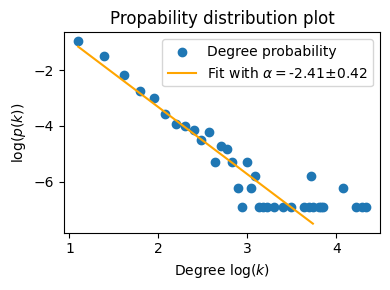

In [14]:
degree_sequence = sorted((d for n, d in Glist2[0].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-30:]),np.log(degP[-30:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-30:]), (linf(np.log(deg[-30:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdism3.pdf", bbox_inches="tight")

[3.40311941e+01 3.64117010e-04 2.73767070e+00]
[-2.93884815  4.01029594]
0.03676836122006138


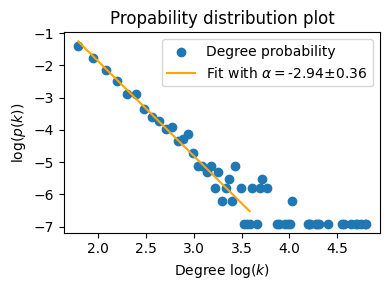

In [15]:
degree_sequence = sorted((d for n, d in Glist2[1].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-30:]),np.log(degP[-30:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-30:]), (linf(np.log(deg[-30:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdism6.pdf", bbox_inches="tight")

[8.78992910e+01 5.21402491e-04 2.81618269e+00]
[-3.04028459  5.07914642]
0.053620012046114156


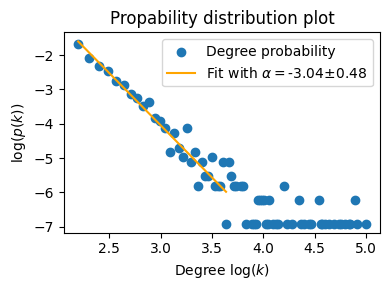

In [16]:
degree_sequence = sorted((d for n, d in Glist2[2].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-30:]),np.log(degP[-30:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-30:]), (linf(np.log(deg[-30:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdism9.pdf", bbox_inches="tight")

[2.17099068e+02 8.57105813e-04 2.94824611e+00]
[-2.90397389  5.2612193 ]
0.07363551485042347


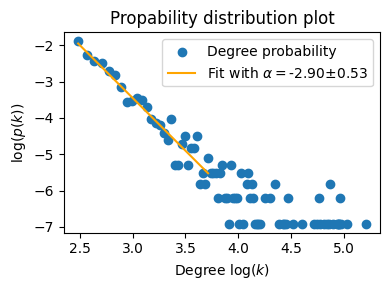

In [17]:
degree_sequence = sorted((d for n, d in Glist2[3].degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence) # Outputs a list in which each degree is listed with its number.
deg, cnt = zip(*degreeCount.items())
avDeg=np.average(deg)
total=np.sum(cnt)
degP=cnt/total

params,covariance=optimize.curve_fit(powerdis,deg, degP)
params2,covariance2=optimize.curve_fit(linf,np.log(deg[-30:]),np.log(degP[-30:]))

print(params)
print(params2)
print(np.diag(covariance)[2]**0.5)

fig = plt.figure("Degree Distribution", figsize=(4,3))



ax2 = fig.add_subplot()
#ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.scatter(np.log(deg),np.log(degP), marker="o", label="Degree probability")
#ax2.loglog(deg, powerdis(deg, *params), linestyle="-",  markersize=1.5,label="Fit with $\\alpha=2.495\pm 0.005$")
ax2.plot(np.log(deg[-30:]), (linf(np.log(deg[-30:]), *params2)), linestyle="-",color="orange",label="Fit with $\\alpha=$"+str("%.2f" % params2[0])+"$\pm$"+str("%.2f" % np.diag(covariance2)[1]**0.5))

ax2.set_title("Propability distribution plot")
ax2.set_xlabel("Degree log($k$)")
ax2.set_ylabel("log($p(k)$)")

ax2.legend()


fig.tight_layout()

plt.savefig("BAdism12.pdf", bbox_inches="tight")

## Degree growth

The `ba_network_growth()` function is a redefinition of the `ba_network()` function defined above. It yields the same network, but tracks the degree of individual nodes (see dicstring).

In [18]:
def ba_network_growth(N, m, track=[5, 95]) :
    '''
    Generate a network according to the Barabási-Albert network model (see `ba_network()` 
    function). Return the network and the degree evolution of nodes with ids specified 
    in the `track` parameter.

    Works exactly like the `ba_network()` function, but tracks the degree at each 
    time step of the nodes whose ids are specified in the argument list `track`.
    '''
    # Initialize with fully-connected network
    m0 = m
    G = nx.complete_graph(m0)

    idx = np.array(range(N))    # Index of node labels (used for sampling)
    ks = np.zeros(N)            # Array of node degrees
    ks[:m0] = m0 - 1
    k_sum = m0 * (m0 - 1)       # Counter for total degree
    
    # Define array to store degree of tracked nodes
    growth = np.zeros((len(track), N))

    # Add t = N - m0 nodes
    for i in range(m0, N) :
        # Pick nodes to connect to
        ns = np.random.choice(idx, size=m, replace=False, p=ks/k_sum)

        # Add edges from new node (i) to selected nodes (ns)
        G.add_edges_from(zip([i]*m, ns))

        # Update degree array and counter
        ks[i] = m
        np.add.at(ks, ns, 1)
        k_sum = k_sum + 2*m
    
        # Record degree of tracked nodes
        for j, n in enumerate(track) :
            growth[j, i] = ks[n]
    
    return G, growth

In [21]:
# Generate new network, tracking the growth of nodes in ns
m = 3
N = 10**4

ns = [5, 95]
G, growth = ba_network_growth(N, m, ns)

growth.shape

(2, 10000)

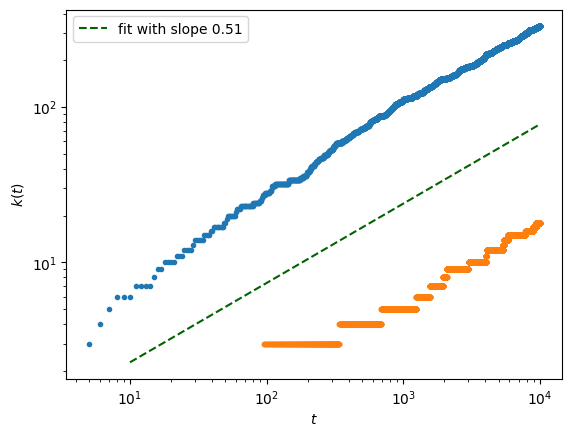

In [22]:
# Visualize the growth sequence obtain above, and 
# fit a linear approximation (average of all nodes)
time = np.empty((len(ns), N), dtype=int)
for i, n in enumerate(ns) :
    time[i] = np.arange(N)

ps = np.empty((len(ns), 2))
for i in range(len(ns)) :
    # Take only times when the node was present
    pos_mask = growth[i] > 0
    growth_pos = growth[i][pos_mask]
    time_pos = time[i][pos_mask]

    # Plot degree growth in log-log scale
    plt.loglog(time_pos, growth_pos,".")

    # Fit linear approximation and record coeffs
    p = np.polyfit(np.log(time_pos), np.log(growth_pos), deg=1)
    ps[i] = p

# for i in range(len(ns)) :
#     # Take only times when the node was present
#     pos_mask = growth[i] > 0
#     growth_pos = growth[i][pos_mask]
#     time_pos = time[i][pos_mask]
    
#     p = np.polyfit(np.log(time_pos), np.log(growth_pos), deg=1)
#     ps[i] = p

# Plot average linear approximation
pts = np.arange(10, 10**4)
z = np.mean(ps[:,0]) * np.log(pts) + np.mean(ps[:,1])
plt.plot(pts, np.exp(z), ls='--', color='darkgreen', label=f'fit with slope {np.mean(ps[:,0]):.2f}')
plt.xlabel('$t$')
plt.ylabel('$k(t)$')
plt.legend()

plt.savefig('BAgrowth.pdf', dpi=300)

## Network visualization

Various visualizations (in increasing order of readability) are included in the cells below. For the sake of time efficiency, a network with 1000 nodes is used as an example.

In [23]:
m = 3
N = 10**3

G = ba_network(N, m)

Here's out first attempt.

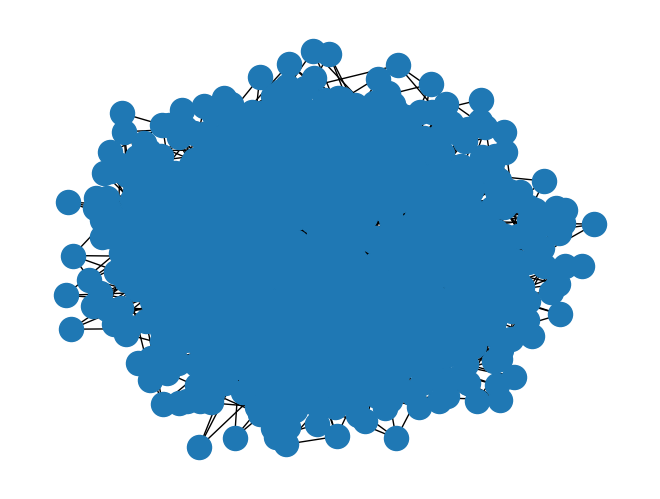

In [24]:
pos_spring = nx.spring_layout(G)

nx.draw(G, pos=pos_spring)

Good luck telling what's going on there... Let's decrease the size of nodes and edges.

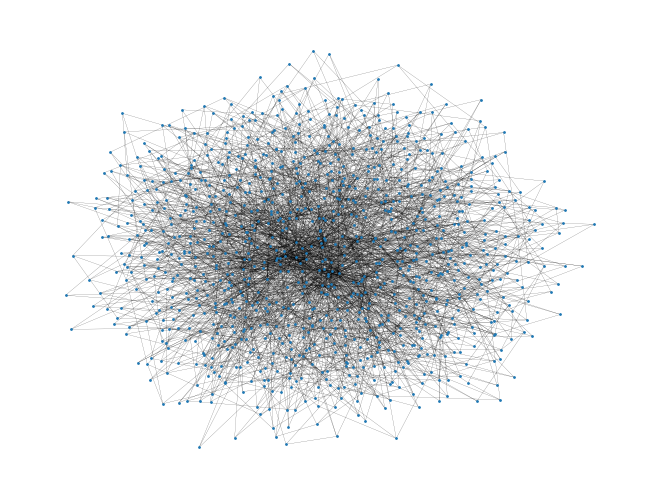

In [25]:
nx.draw(G, pos= pos_spring, node_size=1, width=0.1)

That's a bit better: you can tell there are more connected nodes in the center. Maybe a different layout will make this even clearer.

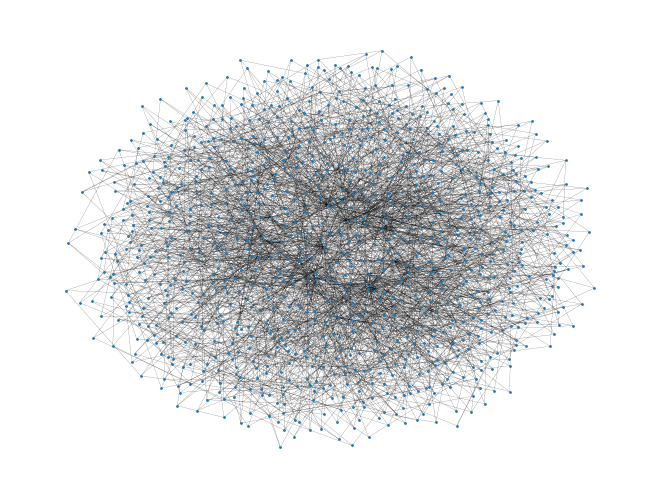

In [26]:
pos_kk = nx.kamada_kawai_layout(G)

nx.draw(G, pos=pos_kk, node_size=1, width=0.1)

We're getting somewhere. The hubs is what we care about, so let's try to make them even more obvious by changing node size and color in proportion to its degree.

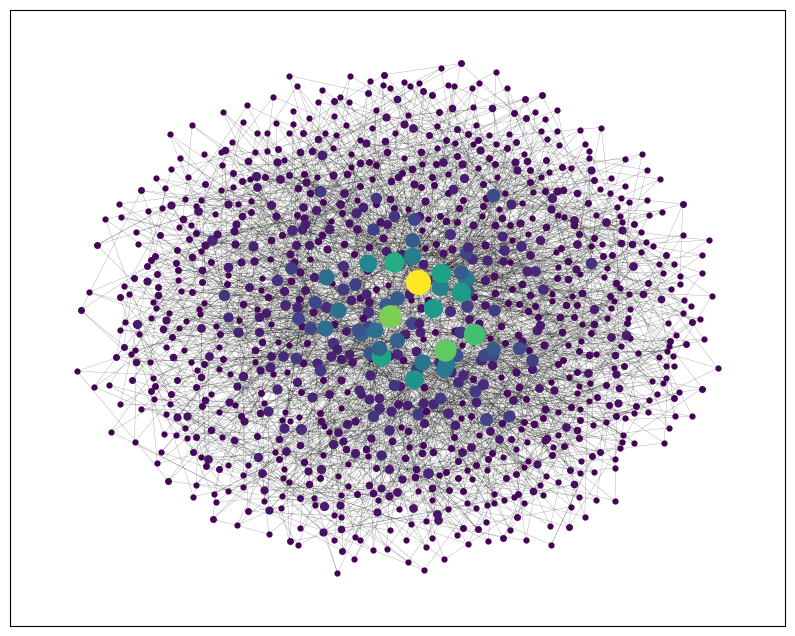

In [27]:
ks = np.array([len(list(nx.neighbors(G, n))) for n in G.nodes])
k_sum = np.sum(ks)
k_max = np.max(ks)
vmin, vmax = np.min(ks), np.max(ks)

fig, ax = plt.subplots(1, figsize=(10,8))

# Small hack — draw each node individually in order to set zorder explicitly
# Otherwise the larger circles are obscured by smaller ones
for node in G.nodes() :
    H = G.subgraph([node])
    collection = nx.draw_networkx_nodes(H, pos_kk, node_size=4*ks[node], node_color=ks[node], ax=ax, vmin=vmin, vmax=vmax)
    collection.set_zorder(N-node)

# nx.draw_networkx_nodes(G, pos=pos_kk, node_size=4*ks, node_color=ks, ax=ax)

nx.draw_networkx_edges(G, pos=pos_kk, width=0.2, alpha=0.5, ax=ax);

plt.savefig('network_degree_viz.png', dpi=300)

Not bad for a NetworkX visualization!

### Animation

The functions below are used to generate an animation of how the network grows over time. (If you want to rerun it, keep in mind that for a large number of frames the animation can take a while to generate!)

In [ ]:
def update(nodelim, G, pos, ax, step_size=1, draw_params={}):
    # ax.clear()

    H = G.subgraph(list(G.nodes())[:nodelim])
    ks = np.array([len(list(nx.neighbors(H, n))) for n in H.nodes])
    nx.draw(H, pos=pos, ax=ax, node_size=draw_scale*ks, node_color=draw_scale*ks, **draw_params)

def run_animation(G, step_lim, step_size=1, gif_filename='ani.gif', interval=200, **draw_params) :
    # Build plot
    fig, ax = plt.subplots(figsize=(10,6))

    # Add dummy nodes at edges as a workaround to fix figure boundaries
    dummy = nx.Graph()
    dummy.add_nodes_from([-1, -2])
    nx.draw(dummy, pos={-1: [-1,-1], -2: [1,1]}, alpha=0)

    # Step size defines number of time steps / nodes to add in each frame
    # Frame node limit is the index of the last node to be shown in each frame
    frame_nodelim = list(G.nodes())[:step_lim:step_size]

    ani = animation.FuncAnimation(fig, update, frames=frame_nodelim, fargs=(G, pos_kk, ax, step_size, draw_params), interval=interval, repeat_delay=5000)
    ani.save(gif_filename, writer='imagemagick')

    plt.show()

In [ ]:
m = 3
N = 10**2

G = ba_network(N, m)
pos_kk = nx.spring_layout(G)
ks = np.array([len(list(nx.neighbors(G, n))) for n in G.nodes])

# nxdraw_params = dict(node_size=4, vmin=0, vmax=1, width=0.1)
draw_scale = 15
nxdraw_params = dict(vmin=draw_scale*np.min(ks), vmax=draw_scale*np.max(ks), width=0.01)
gif_filename = "ba_growth_ani.gif"

step_lim = int(N)
step_size = 2
interval = 100  # ms delay

run_animation(G, step_lim, step_size, gif_filename, interval=interval, **nxdraw_params)